# Xpand IT DS Challenge

This notebook contains the template you should use to present your code, results and conclusions. You should keep the main structure intact to make it easier to evaluate and compare in the end.

## Business Analysis
Here you should conduct a brief analysis of what is Dow Jones Index. You can enumerate the main topics to take into account based on the dataset provided as well as your understandings of the variables.


-----
Created in 1986, the Jow Jones Industrial Average, represented by the ticker DJIA, is a tracker which focuses on 30 of the United States of America's large, publicly-owned blue chip companies trading on the New York Stock Exchange (NYSE). The index serves as a benchmark for market performance, given the company's performance is directly tied to the country's performance. <br>

Whilst the companies listed in the index aren't all in the industrial sector, at the time of the index's creation, they were mainly focused on railroad, cotton, gas, sugar, tobacco and oil-industry. Whilst the majority of the index’s members were added up to 1990, the 21st century reflected in change in its structure, with Verizon and Pfizer paving the way in 2004. Around 4 years later the Chevron Corporation, Cisco Systems were added and within an additional 4-year gap, Visa Inc., Goldman and Sachs Nike and Apple Inc. became new members of the index. <br>
The Dow Jones Index, as a financial market, tracks the transaction’s daily history, from its trading volume, to the daily open stock value, close,  daily highest and lowest values. 


## Index

[1-Data Understanding](#DataUnderstanding) <br>
[2-Data Loading](#DataLoading) <br>
[3-Handle Missing Data](#HandleMissingData) <br>
[4-Defining the Target Variable](#TargetVariable) <br>
[5-Feature Engineering](#FeatureEngineering) <br>
##### [Method 1 - No Serial Correlation](#NoSerialCorrelation)
(Exploratory Data Analysis) <br>
[6-Removing Outliers](#RemovingOutliers) <br>
[7-Distribution Reshaping](#DistributionReshaping) <br>
[8-Correlations](#Correlations) <br>
[9-Feature Selection](#FeatureSelection) <br>
[10-Modelling](#Modelling) <br>
##### [Method 2 - Serial Correlation](#SerialCorrelation) 
##### [Conclusion ](#Conclusion) 

<a id='DataUnderstanding'></a>
## Data Understanding

In [1]:
import os

from collections import defaultdict
from typing import Dict, List, Set

# Financial Data API
import quandl as qdl

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd
import numpy as np

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Time Series
# FB's Prophet isnt working
#from fbprophet import Prophet

# Configure Seaborn
sns.set_style("darkgrid")
%matplotlib inline

<a id='DataLoading'></a>
### Data Loading

In [2]:
# The data dump's location
data_dir: str = './data/dow_jones_index.data'
data: pd.DataFrame = pd.read_csv(data_dir)

| Feature Name | Original Description   |
|------|------|
|   quarter  | the yearly quarter (1=Jan-Mar; 2=Apr-Jun)|
|   stock  | the stock symbol (see below)|
|   date  | the last business day of the work (this is typically a Friday)|
|   open  | the price of the stock at the beginning of the week|
|   high  | the highest price of the stock during the week|
|   low  | the lowest price of the stock during the week|
|   close  | the price of the stock at the end of the week|
|   volume  | the number of shares of stock that traded hands in the week|
|   percent_change_price  | the percentage change in price throughout the week|
|   percent_change_volume_over_last_week  | the percentage change in the number of shares of stock that traded hands for this week compared to the previous week|
|   previous_weeks_volume  | the number of shares of stock that traded hands in the previous week|
|   next_weeks_open  | the opening price of the stock in the following week|
|   next_weeks_close  | the closing price of the stock in the following week|
|   percent_change_next_weeks_price  | the percentage change in price of the stock in the following week|
|   days_to_next_dividend  | the number of days until the next dividend|
|   percent_return_next_dividend | the percentage of return on the next dividend|

In [3]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


From the data head its clear that *stock*, *date*, *open*, *high*, *low*, *close*, *next_weeks_open* and *next_weeks_close* are formatted as objects. We will need to convert/extract the data before proceeding. Confirm using info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [5]:
# Remove the dollar sign and coerce into float
dollar_columns: List = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
data[dollar_columns] = data[dollar_columns].replace('\$', '', regex=True).astype(float)

# Format dates
data['date'] = pd.to_datetime(data.date)

In [6]:
# Get a quick insight on 
data.describe()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.520000,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,53.702440,53.889080,0.238468,52.525333,0.691826
std,0.499933,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.543478,1.592322e+08,32.778111,33.016677,2.679538,46.335098,0.305482
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,30.315000,30.462500,-1.222067,24.000000,0.534549
50%,2.000000,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.512586,5.294556e+07,46.015000,46.125000,0.101193,47.000000,0.681067
75%,2.000000,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,21.800622,1.333230e+08,72.715000,72.915000,1.845562,69.000000,0.854291
max,2.000000,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210


In [7]:
data.describe(include=['O'])

,stock
count,750
unique,30
top,VZ
freq,25


<a id='HandleMissingData'></a>
### Handle missing data

In [8]:
#We have missing data in percent_change_volume_over_last_wk and previous_weeks_volume 
data.isna().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [9]:
data[data['percent_change_volume_over_last_wk'].isna() | data['previous_weeks_volume'].isna()]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
12,1,AXP,2011-01-07,43.30,45.60,43.11,44.36,45102042,2.448040,NaN,NaN,44.20,46.25,4.638010,89,0.405771
24,1,BA,2011-01-07,66.15,70.10,66.00,69.38,36258120,4.882840,NaN,NaN,69.42,70.07,0.936330,33,0.605362
36,1,BAC,2011-01-07,13.85,14.69,13.80,14.25,1453438639,2.888090,NaN,NaN,14.17,15.25,7.621740,54,0.070175
48,1,CAT,2011-01-07,94.38,94.81,92.30,93.73,24135903,-0.688705,NaN,NaN,93.21,94.01,0.858277,11,0.469433
60,1,CSCO,2011-01-07,20.45,21.00,20.38,20.97,303545878,2.542790,NaN,NaN,20.94,21.21,1.289400,81,0.286123
72,1,CVX,2011-01-07,91.66,92.48,90.27,91.19,35556288,-0.512765,NaN,NaN,90.95,92.83,2.067070,38,0.789560
84,1,DD,2011-01-07,50.05,50.54,49.28,49.76,27658789,-0.579421,NaN,NaN,48.30,49.80,3.105590,35,0.823955
96,1,DIS,2011-01-07,37.74,40.00,37.62,39.45,72917621,4.531000,NaN,NaN,39.01,39.29,0.717765,336,1.013940
108,1,GE,2011-01-07,18.49,18.72,18.12,18.43,280146510,-0.324500,NaN,NaN,18.61,18.82,1.128430,38,0.759631


#### As expected the missing data corresponds to the starting period where the preceeding week's information is not available. In this case, fill the data with the proceeding value, in other words, the immediately available value.

In [10]:
# Sort the data before performing any type of operation
# recall that financial data only makes sense when sorted, especially when indicators are to be used
data.sort_values(by=['date', 'stock'], axis=0, ascending= True, inplace=True)

# Fill the missing values by using the first available data point
data.fillna(method='bfill', inplace=True)

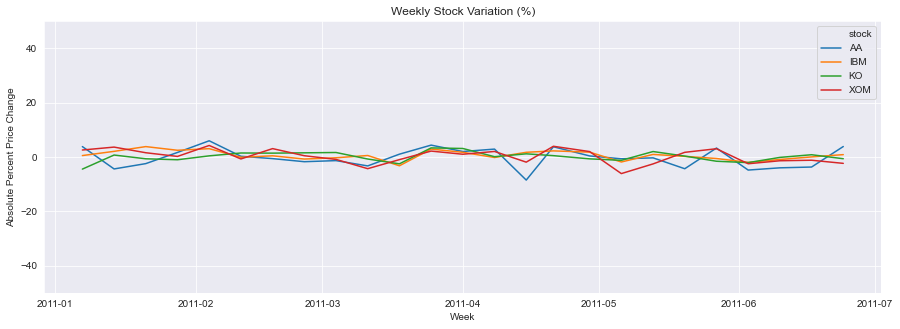

In [11]:
tickers_subset: List = ['AA', 'IBM', 'XOM', 'KO']
figure = plt.figure(figsize=(15, 5))
figure = sns.lineplot(data=data[data['stock'].isin(tickers_subset)], x='date', y='percent_change_price', hue='stock')
figure.set_ylim(-50, 50)
figure.set_title("Weekly Stock Variation (%)")
figure.set_xlabel("Week")
figure.set_ylabel("Absolute Percent Price Change")
figure.plot();

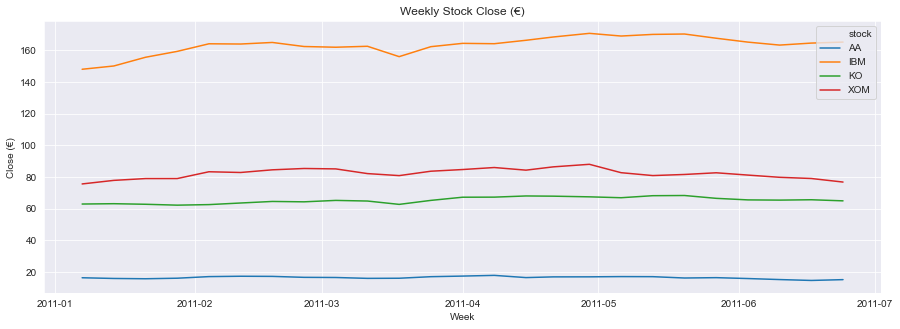

In [12]:
tickers_subset: List = ['AA', 'IBM', 'XOM', 'KO']
figure = plt.figure(figsize=(15, 5))
figure = sns.lineplot(data=data[data['stock'].isin(tickers_subset)], x='date', y='close', hue='stock')
figure.set_title("Weekly Stock Close (€)")
figure.set_xlabel("Week")
figure.set_ylabel("Close (€)")
figure.plot();

<a id='TargetVariable'></a>
### Target Variable

I identified two potential candidates for the target variable: the weekly percentual price changes, *percent_change_next_weeks_price*; and the following week's close, *next_weeks_close*.

There are two main reasons behind using percentual change instead of the raw price or its variation:
* Using the percentual price change represents a naturally constrained feature, which is bound to suffer no major changes in its range, unlike the raw prices and price variation. Using the raw values would require using an absolute scaler, with the potential to destroy the underlying values (excessive shrinkage from lack of point accuracy), should the price range be large
* The previous point can also help preventing model drift. Drastically different price ranges may cause the model to underperform due to the need of an extreme generalization. Percentual changes on the other hand, can be bounded to an extreme value e.g 10000% increase with no major value loss.
    
As for the next week's close, it is the feature which financial institutions are typically concerned about.

I selected *next_weeks_close* for two main reasons:
- It is the typical object which the customer is concerned about
- The percentual change is dependent on the previous week, this implies serial correlation and is typically not suitable for long-term forecasting.

### Dropping unecessary features
Before advancing any further its important to remove features which I deemed not relevant or appropriate for the analysis.
Namely, features relating with the future cannot be used, given they will introduce leakage. 

In [13]:
data.drop(['next_weeks_open', 'percent_change_next_weeks_price', 'percent_return_next_dividend'], axis=1, inplace=True)

<a id='FeatureEngineering'></a>
## Feature Engineering

##### Exceptionally, and unlike typical analysis, I opted for creating the additional features before performing the EDA so they can be used in both analysis: no serial correlation and time series.

Enhance the data by building typical indicators used in trading

OBV, On Balance Volume:
$ {OBV}_{t} = {OBV}_{t-1} \begin{cases}
        Volume, close_t > close_{t-1}\\
        0\\
        -Volume, close_t < close_{t-1}\\
    \end{cases} $

Simple Moving Average : ${SMA}_{t} = \frac{1}{t} \sum_{i=0}^{n-1} {p_{t-i}}$ <p>

In [14]:
def compute_sma(df: pd.DataFrame, n: int, target_column:str, dest_column: str = 'sma') -> None:
    '''add comments'''
    
    if df is None or n is None or target_column is None:
        raise ValueError(__name__, '::compute_sma() invalid arguments')
    
    # The SMA should be applied for each ticker individually
    for ticker in df.stock.unique():
        ticker_data: pd.DataFrame = df.loc[df.stock == ticker, :]
        df.loc[df.stock == ticker, dest_column] = ticker_data.loc[:, target_column].rolling(window= n).mean()

Exponential Moving Average : $ {EMA}_{t} =\begin{cases}
        P_t, t=1\\
        \alpha * P_t + (1-\alpha) * P_{t-1}, t>1 \\
    \end{cases} $ <p>

In [15]:
def compute_ema(df: pd.DataFrame, n: int, target_column:str, dest_column: str = 'ema') -> None:

    if df is None or n is None or target_column is None:
        raise ValueError(__name__, '::compute_ema() invalid arguments')
        
    for ticker in df.stock.unique():
        ticker_data: pd.DataFrame = df.loc[df.stock == ticker, :]
        df.loc[df.stock == ticker, dest_column] = ticker_data.loc[:, target_column].ewm(span=n, min_periods=0, adjust= False, ignore_na= False).mean()

Moving Average Convergence Divergence: <p>
    ${MACD}_t = (EMA_{12} - EMA_{26}) - {EWMA}_{MACD_t} $ <p>
where EWMA is an Exponentially Weighted Moving Average.


In [16]:
def compute_macd(df: pd.DataFrame, target_column: str, dest_column: str = 'macd') -> None:
    
    if target_column is None:
        raise ValueError(__name__, '::compute_macd() invalid arguments')
    
    for ticker in df.stock.unique():
        ticker_data: pd.DataFrame = df.loc[df.stock == ticker, :]
            
        ewma12: pd.Series = ticker_data.loc[:, target_column].ewm(span= 12, adjust= False).mean()
        ewma26: pd.Series = ticker_data.loc[:, target_column].ewm(span= 26, adjust= False).mean()
        macd: pd.Series = ewma26 - ewma12
        
        # compute the signal
        df.loc[df.stock == ticker, dest_column] =  macd.ewm(span= 9, adjust= False).mean()

Stochastic Oscillator:  $ K_t = (\frac{C_t- min_{[t, t-14]}}{max_{[t, t-14]}-min_{[t, t-14]}})*100 $ 

In [17]:
def compute_stoch(df: pd.DataFrame, target_column: str, dest_column: str = 'stoch') -> None:
    '''
        Compute a stochastic oscillator:
            
    '''
    
    if df is None or target_column is None:
        raise ValueError(__name__, '::compute_stoch() invalid arguments')
        
    for ticker in df.stock.unique():
        ticker_data: pd.DataFrame = df.loc[df.stock == ticker, :]
        target_data: pd.Series = ticker_data.loc[:, target_column]
            
        min_value: pd.Series = target_data.rolling(window= 14, min_periods= 1).min()
        max_value: pd.Series = target_data.rolling(window= 14, min_periods= 1).max()
        df.loc[df.stock == ticker, dest_column] = (target_data - min_value) / (max_value - min_value)

BO, Bollinger Bands:  <p>
$Upper Band_{n,m} =  MA(TP, n) + m * \sigma_{[TP, n]}$   <p>
$Lower Band_{n,m} =  MA(TP, n) - m * \sigma_{[TP, n]}$   <p>
$TP = \frac{High + Low + Close}{3} $ <p>
where n represents the smoothing period, m the number of standard deviations and $\sigma_{[TP, n]}$ the average standard deviation over the last n periods. <p>

In [18]:
def compute_bbands(df: pd.DataFrame, n: int, dest_column_prefix: str = 'bbands') -> None:
    
    if df is None or n is None:
        raise ValueError(__name__, '::compute_bbands() invalid arguments')
        
    for ticker in df.stock.unique():
        ticker_data: pd.DataFrame = df.loc[df.stock == ticker, :]
            
        tp = (ticker_data[['high', 'low', 'close']].sum(axis=1)) / 3

In [19]:
compute_sma(data, 4, 'close')
compute_ema(data, 4, 'close')
compute_macd(data, 'close')
compute_stoch(data, 'close')

In [20]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_close,days_to_next_dividend,sma,ema,macd,stoch
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.792670,1.380223,239655616.0,15.97,26,NaN,16.42,0.0,NaN
12,1,AXP,2011-01-07,43.30,45.60,43.11,44.36,45102042,2.448040,1.380223,239655616.0,46.25,89,NaN,44.36,0.0,NaN
24,1,BA,2011-01-07,66.15,70.10,66.00,69.38,36258120,4.882840,1.380223,239655616.0,70.07,33,NaN,69.38,0.0,NaN
36,1,BAC,2011-01-07,13.85,14.69,13.80,14.25,1453438639,2.888090,1.380223,239655616.0,15.25,54,NaN,14.25,0.0,NaN
48,1,CAT,2011-01-07,94.38,94.81,92.30,93.73,24135903,-0.688705,1.380223,239655616.0,94.01,11,NaN,93.73,0.0,NaN


In [21]:
quandl_api_key: str = os.environ.get('QUANDL_API_KEY')

if not quandl_api_key:
    raise ValueError(__name__, ' could not retrieve the QuanDL API key.')

qdl.ApiConfig.api_key = quandl_api_key
data_api = qdl.get('WIKI/AA', start_date= data['date'].min(), end_date= data['date'].max(), collapse='weekly')
data_api.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,


There is no available data at QuanDL for the specified stocks in the specified period which could be used to enhance the data set beyond feature engineering.

#### Lagged feature missing data
The added features contain missing values given their lagged nature. Proceed to the same input method: find the nearest adjacent value

In [22]:
# Fill the missing values by using the first available data point
data.fillna(method='bfill', inplace=True)

<a id='Methods'></a>
## Methods
### No Serial Correlation
Due to the low amount of observations, sometimes regular ML is able to achieve a higher precision then time series. For this reason, and whilst I'm expecting a low accuracy, I will test both methods. In addition, the data seems to be stationary which makes it a prime candidate for traditional ML.
### Serial Correlation
Perform time series based forecast

<a id='NoSerialCorrelation'></a>
## No Serial Correlation

### Data Understanding 

The current section assumes there is no serial correlation between the dataset, i.e., the observations are independent thus, standard ML procedures are used (no Time Series).

In [23]:
serial_data: pd.DataFrame = data.copy()


# Split the data before doing any transformation so we only apply transformations (inc. outlier removal) on the train set, avoiding data leakage
serial_x: pd.DataFrame = serial_data.drop(['next_weeks_close'], axis=1)
serial_y: pd.DataFrame = serial_data[['next_weeks_close']]

# Instead of using SKLearn's train_test_split, split the data by hand so we can remove the trailing 30% for testing
#serial_x_train, serial_x_test, serial_y_train, serial_y_test = train_test_split(serial_x, serial_y, test_size=0.3, random_state=42)

train_sample_size: int = int(serial_x.shape[0] * 0.7)
    
serial_x_train: pd.DataFrame = serial_x.iloc[:train_sample_size]
serial_x_test: pd.DataFrame = serial_x.iloc[train_sample_size:]
serial_y_train: pd.DataFrame = serial_y.iloc[:train_sample_size]
serial_y_test: pd.DataFrame = serial_y.iloc[train_sample_size:]

serial_train: pd.DataFrame = pd.concat([serial_x_train, serial_y_train], axis = 1)
serial_test: pd.DataFrame = pd.concat([serial_x_test, serial_y_test], axis = 1)
   
# We will need the dates further on for plotting the predicted results
# parse them after the outliers are removed to facilitate index matching
serial_train_dates: pd.DataFrame = None
serial_test_dates: pd.DataFrame = None

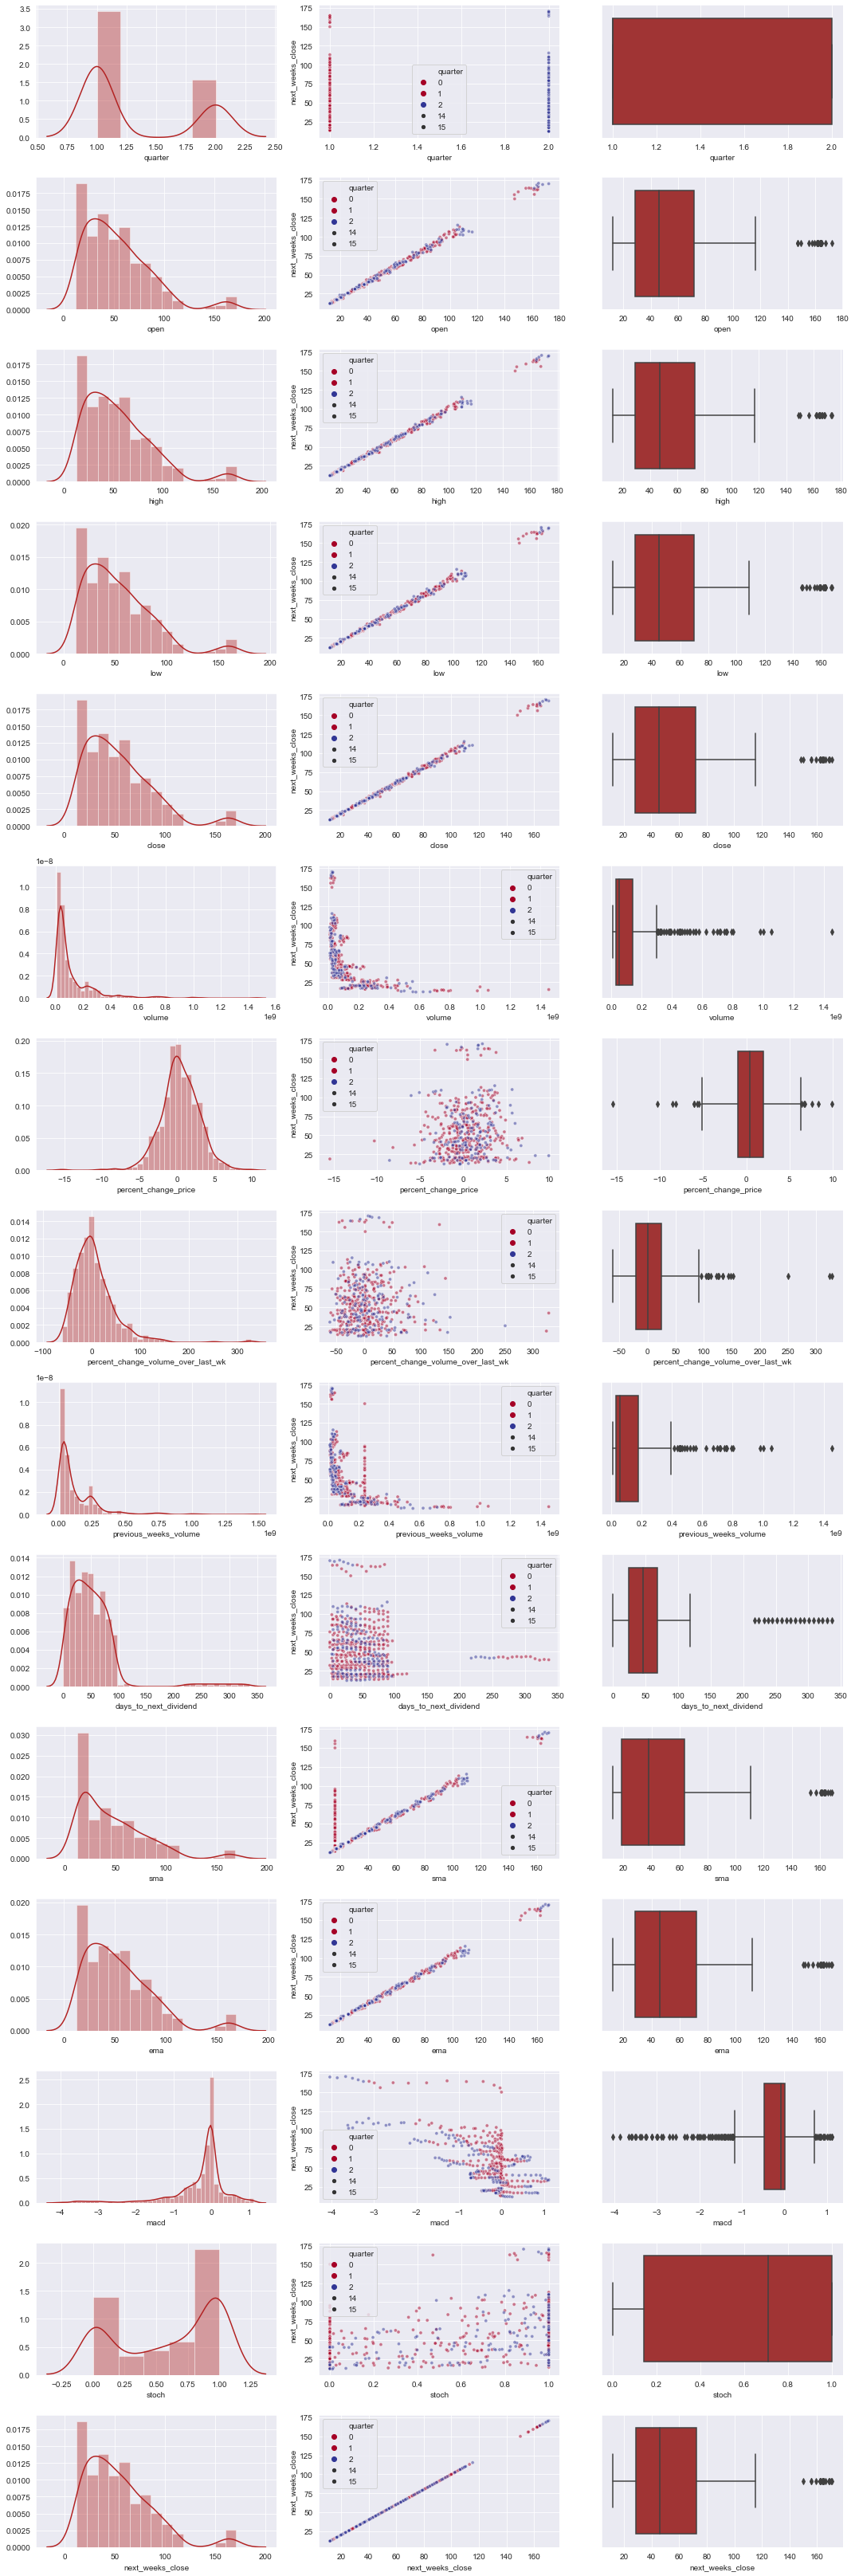

In [24]:
# Pairplots are not a good call for feature_count > 6 as visualization becomes hard, replace with subplots
data_columns: List = serial_train.select_dtypes(exclude=[object]).columns.to_list()

# Quarter will be used as hue, don't create a subplot for it
fig, axes = plt.subplots(len(data_columns) -1,3, figsize=(15, 45))

for i, column in enumerate(data_columns):
    
    if column in ['date']:
        continue
    
    # Remove the effect of not plotting quarter
    ax_id: int = max(i-1, 0)
        
    sns.distplot(serial_train[column]
                 ,ax= axes[ax_id, 0]
                 ,color='firebrick')
    sns.scatterplot(data=serial_train
                    ,x=column
                    ,y='next_weeks_close'
                    ,ax= axes[ax_id, 1]
                    ,hue='quarter'
                    ,palette="RdYlBu"
                    ,size=15
                    ,alpha=0.5)
    sns.boxplot(data=serial_train
                ,x=column
                #,y='percent_change_next_weeks_price'
                ,ax= axes[ax_id, 2]
                ,color='firebrick')

plt.tight_layout()

<a id='RemovingOutliers'></a>
#### Removing Outliers
The dataset contains outliers for most features. However, I opted for considering only distant and isolated clusters which might be leverage points:
* Volume > 1.4
* next_weeks_close, the target, is a candidate with plenty of potential outliers. However, these are extreme and benefitial events, hence, they will not be dropped.
* The same rationale is applicable to EMA, MACD and SMA, removing their outliers would imply removing the extreme posivite target feature's observations.
* percent_change_price has bilateral outliers. However, given in Finance fat tails, especially for negative events are crucial, we will keep them even if they compromise part of our model's accuracy. With the exception of the observation < -15, which needs to be manually validated as its likely to be a high levarage point.
* previous_weeks_volume > 1.4
* percent_change_volume_over_last_wk is a candidate for values larger than 200. However, this will imply several observations whose removal might distort the other features. This will require manual validation.

In [25]:
# Visualize cases where volume > 1.4
serial_train[serial_train['volume'] > 1400000000]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,sma,ema,macd,stoch,next_weeks_close
36,1,BAC,2011-01-07,13.85,14.69,13.8,14.25,1453438639,2.88809,1.380223,239655616.0,54,16.0775,14.25,0.0,0.0,15.25


In [26]:
serial_train = serial_train[serial_train['volume'] <= 1400000000]

In [27]:
# Visualize cases where previous_weeks_volume < 15
serial_train[serial_train['percent_change_price'] < -15]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,sma,ema,macd,stoch,next_weeks_close
65,1,CSCO,2011-02-11,22.11,22.34,18.61,18.7,1000362015,-15.4229,323.282152,236334561.0,46,20.6,20.306282,0.010895,0.0,18.85


In [28]:
serial_train.loc[serial_data['stock'] == 'CSCO'].groupby(['stock', 'quarter']).agg(
    PercentChangePriceMax = pd.NamedAgg(column='percent_change_price', aggfunc='max'),
    PercentChangePriceMin = pd.NamedAgg(column='percent_change_price', aggfunc='min'),
    CloseMax = pd.NamedAgg(column='close', aggfunc='max'),
    CloseMin = pd.NamedAgg(column='close', aggfunc='min'),
    OpenMax = pd.NamedAgg(column='open', aggfunc='max'),
    OpenMin = pd.NamedAgg(column='open', aggfunc='min'),
    HighMax = pd.NamedAgg(column='high', aggfunc='max'),
    HighMin = pd.NamedAgg(column='high', aggfunc='min'),
    LowMax = pd.NamedAgg(column='low', aggfunc='max'),
    LowMin = pd.NamedAgg(column='low', aggfunc='min'),
    SMAMax = pd.NamedAgg(column='sma', aggfunc='max'),
    SMAMin = pd.NamedAgg(column='sma', aggfunc='min'),
    EMAMax = pd.NamedAgg(column='ema', aggfunc='max'),
    EMAMin = pd.NamedAgg(column='ema', aggfunc='min'),
    MACDMax = pd.NamedAgg(column='macd', aggfunc='max'),
    MACDMin = pd.NamedAgg(column='macd', aggfunc='min'),
    STOCHMax = pd.NamedAgg(column='stoch', aggfunc='max'),
    STOCHMin = pd.NamedAgg(column='stoch', aggfunc='min'),
).reset_index()

,stock,quarter,PercentChangePriceMax,PercentChangePriceMin,CloseMax,CloseMin,OpenMax,OpenMin,HighMax,HighMin,LowMax,LowMin,SMAMax,SMAMin,EMAMax,EMAMin,MACDMax,MACDMin,STOCHMax,STOCHMin
0,CSCO,1,5.35117,-15.42290,22.05,17.14,22.11,17.34,22.34,17.64,20.73,16.97,21.2275,16.0775,21.377136,17.700178,0.479594,-0.016174,1.000000,0.0
1,CSCO,2,3.76249,-3.83964,17.65,16.94,17.71,16.88,18.29,16.96,17.28,16.52,17.3525,17.1650,17.521664,17.170999,0.856601,0.574681,0.121756,0.0


All of the features fall within the expected range with the exception of the *percent_change_price*. Remove the observation as it does not show signs of being meaningful.

In [29]:
serial_train = serial_train[serial_train['percent_change_price'] > -15]

In [30]:
# Visualize cases where previous_weeks_volume > 1.4
serial_train[serial_train['previous_weeks_volume'] > 1400000000]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,sma,ema,macd,stoch,next_weeks_close
37,1,BAC,2011-01-14,14.17,15.25,14.09,15.25,760935694,7.62174,-47.645833,1.453439e+09,47,16.0775,14.65,-0.015954,1.0,14.25


In [31]:
# Remove the observation
serial_train = serial_train[serial_train['previous_weeks_volume'] <= 1400000000]

In [32]:
# Visualize cases where percent_change_volume_over_last_wk > 200
serial_train[serial_train['percent_change_volume_over_last_wk'] > 200]

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,sma,ema,macd,stoch,next_weeks_close
139,1,HPQ,2011-02-25,47.57,48.55,42.08,42.68,211147488,-10.27960,327.408924,49401750.0,17,46.855,45.808560,-0.323032,0.000000,42.61
637,2,MSFT,2011-04-29,25.56,26.87,25.34,25.92,554889924,1.40845,249.984056,158547201.0,18,25.720,25.713887,0.694079,0.377104,25.87


In [33]:
serial_train = serial_train[serial_train['percent_change_volume_over_last_wk'] <= 200]

In [34]:
serial_train_dates: pd.DataFrame = pd.DataFrame(serial_train['date'])
serial_test_dates: pd.DataFrame = pd.DataFrame(serial_test['date'])
    
serial_train = serial_train.drop(['date'], axis=1)
serial_test = serial_test.drop(['date'], axis=1)

In [35]:
# Reset our train test splits according to the dropped features
serial_x_train: pd.DataFrame =serial_train.drop(['next_weeks_close'], axis=1)
serial_x_test: pd.DataFrame = serial_test.drop(['next_weeks_close'], axis=1)
serial_y_train: pd.DataFrame = serial_train['next_weeks_close']
serial_y_test: pd.DataFrame = serial_test['next_weeks_close']

<a id='DistributionReshaping'></a>
#### Distribution Reshaping
The variables *open*, *high*, *low*,*close*, *volume*, *percent_change_volume_over_last_wk*,*previous_weeks_volume*, *next_weeks_open*, *next_weeks_close*, *days_to_next_dividend* seem to have a high skewness, use a log-transformation to help reshape them into a quasi-Gaussian distribution.

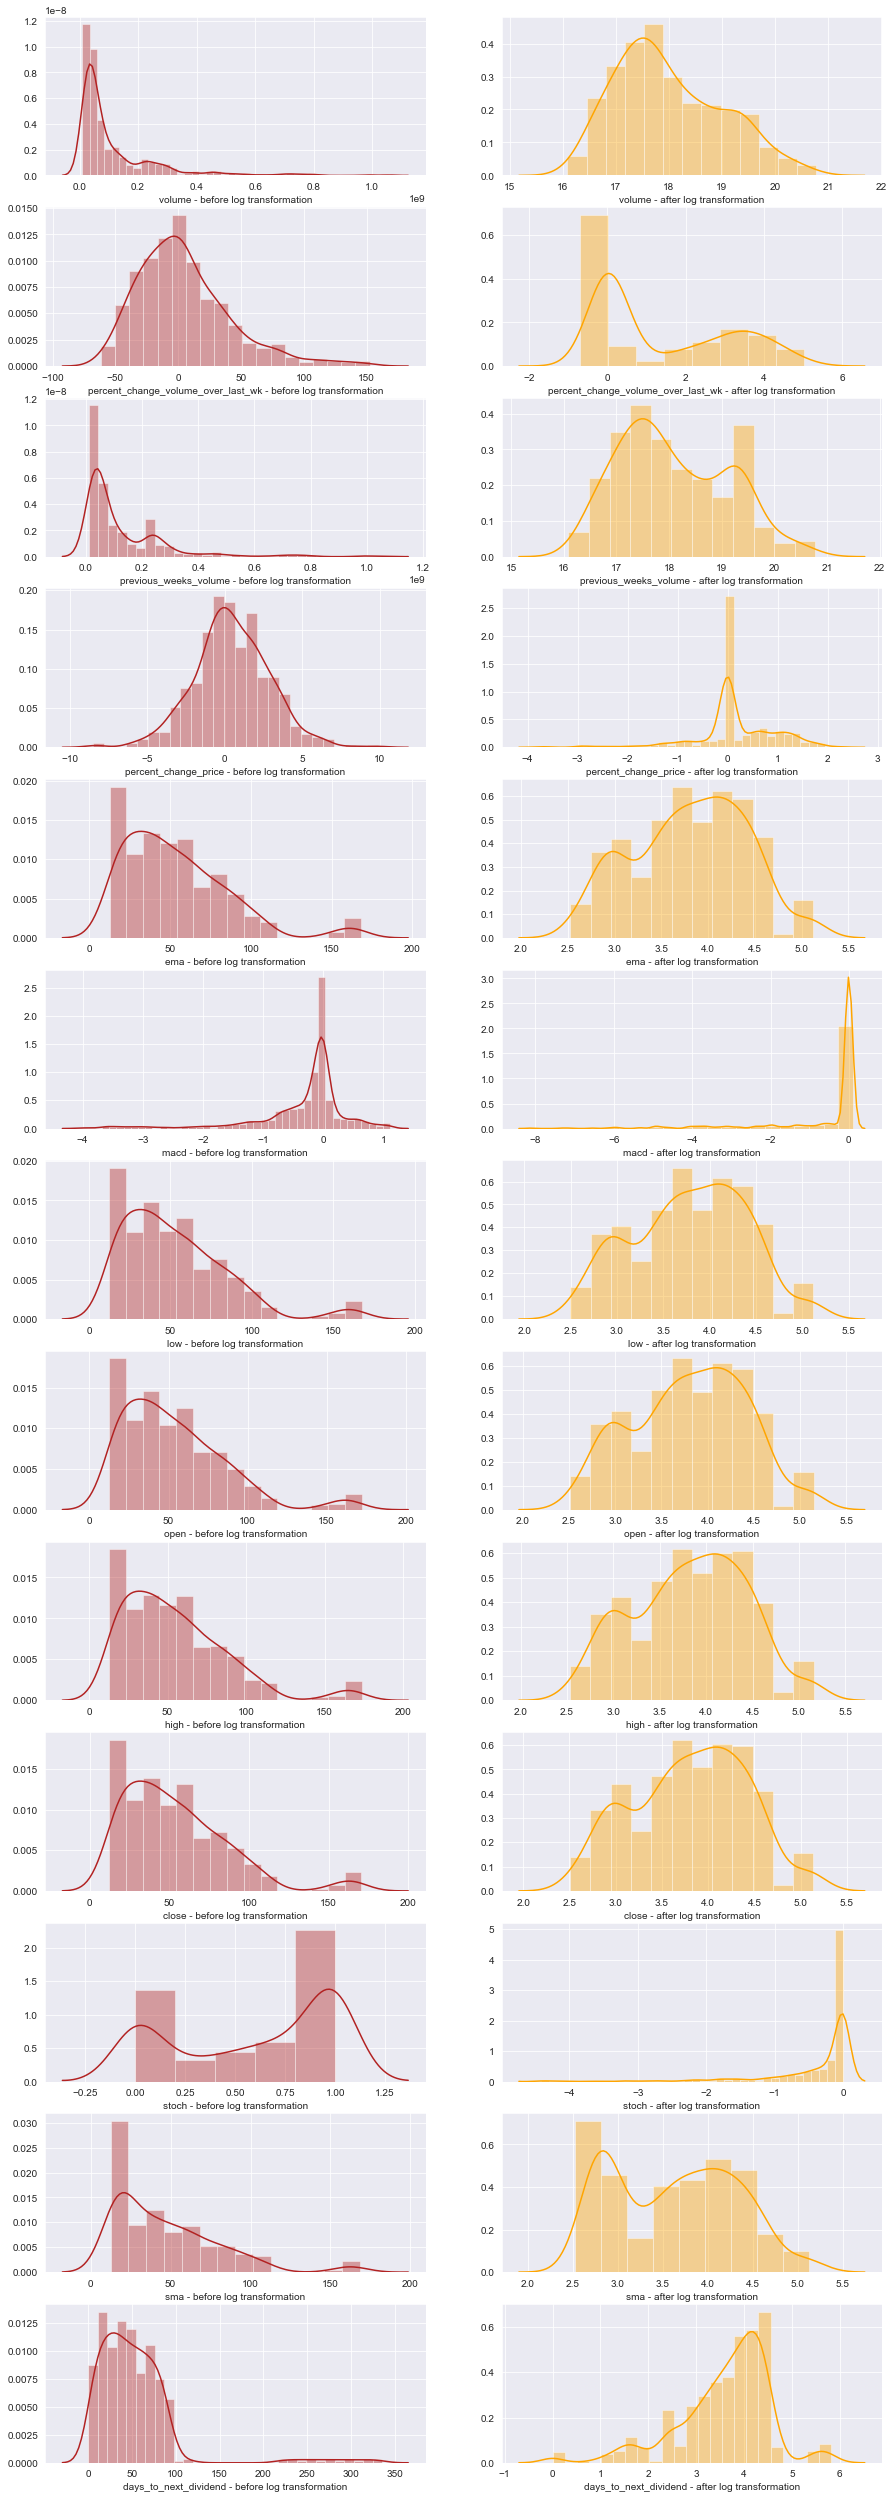

In [36]:
# Visualize the features before and after the transformation
log_transform: Set = {
    'open'
    ,'high'
    ,'low'
    ,'close'
    ,'volume'
    ,'percent_change_price'
    ,'percent_change_volume_over_last_wk'
    ,'previous_weeks_volume'
    ,'days_to_next_dividend'
    ,'sma'
    ,'ema'
    ,'macd'
    ,'stoch'
}

fig, axes = plt.subplots(len(log_transform), 2, figsize=(15,45))

for i, feature in enumerate(log_transform):
    fig: plt.Figure = None
        
    # I stumbled upon a seaborn corner case where the feature is not well described by a Gaussian distribution estimate
    # as seen in https://github.com/mwaskom/seaborn/issues/1990
    # I worked around it by coercing a small bandwitdth manually
    if feature == 'macd':
        fig = sns.distplot(serial_train[feature], ax= axes[i, 0], color='firebrick', kde_kws={'bw':0.1})
        fig.set_xlabel(feature + ' - before log transformation')
        fig = sns.distplot(serial_train[feature].apply(lambda x: np.log(x) if x > 0 else 0), ax= axes[i, 1], color='orange', kde_kws={'bw':0.1})
        fig.set_xlabel(feature + ' - after log transformation')
    else:
        fig = sns.distplot(serial_train[feature], ax= axes[i, 0], color='firebrick')
        fig.set_xlabel(feature + ' - before log transformation')
        fig = sns.distplot(serial_train[feature].apply(lambda x: np.log(x) if x > 0 else 0), ax= axes[i, 1], color='orange')
        fig.set_xlabel(feature + ' - after log transformation')

All the variables, except for *macd*, *stoch*, *percent_change_volume_over_last_wk*, *percent_change_price*, (which became bimodal), seem to be improved by the log-transform. Modify in the original dataset.

In [37]:
log_transform -= {'macd', 'stoch', 'percent_change_volume_over_last_wk', 'percent_change_price'}
log_transform_list: List = [a for a in log_transform]
    
for feature in log_transform:
    serial_train[feature] = serial_train[feature].apply(lambda x: np.log(x) if x > 0 else 0)
    serial_test[feature] = serial_test[feature].apply(lambda x: np.log(x) if x > 0 else 0)

<a id='Correlations'></a>
#### Correlations

The scatterplots show a linear relationship between each feature and our target hence, we can use Pearson's correlation.

In [38]:
def plot_corr(data: pd.DataFrame) -> None:
    # Compute the correlations
    correlations: np.array = data.corr(method='pearson')
    # Compute the lower triangle of the correlations matrix
    corr_mask: np.ndarray = np.triu(np.ones_like(correlations, dtype=np.bool))

    figure, ax = plt.subplots(figsize=(11,9))

    # We can't initialize a custom colourmap due to a seaborn bug
    # see issue #1907: https://github.com/mwaskom/seaborn/issues/1907
    #cmap = sns.diverging_palette(220, 10, n=9, as_cmap=True)

    sns.heatmap(correlations
                ,mask=corr_mask
                ,square=True
                ,linewidths=0.5
                ,vmin=-1
                ,vmax=1
                ,cmap='coolwarm'
                ,annot=True
                ,cbar_kws={"shrink": 0.9});

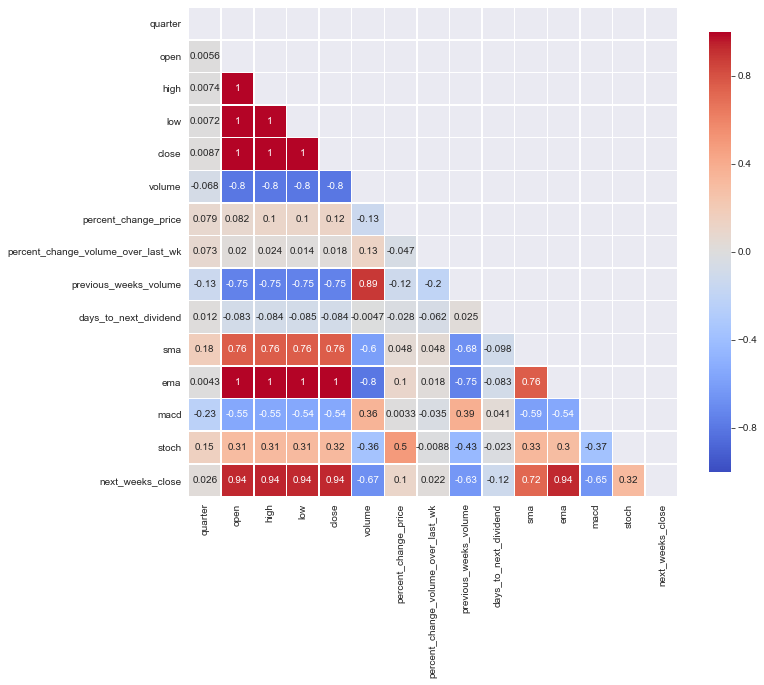

In [39]:
plot_corr(serial_train)

There is a perfect correlation between the dialy indicators (*open*, *high*, *low*, *close*) and the *SMA* and *EMA* features, and a moderate negative correlation with MACD. <br>

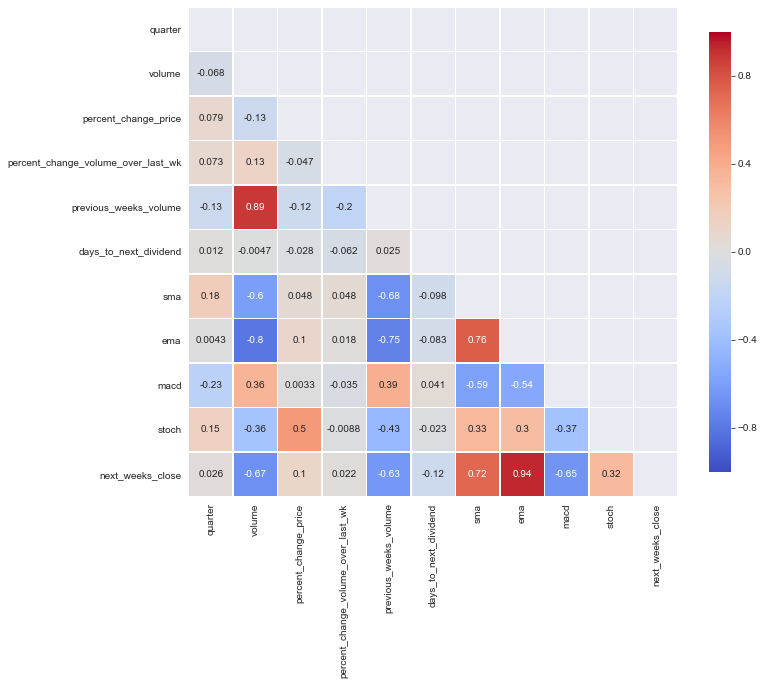

In [40]:
# plot_corr(serial_data)
plot_corr(serial_train.drop(['open', 'high', 'low', 'close'], axis=1))

In [41]:
serial_train.drop(['open', 'high', 'low', 'close'], axis=1, inplace=True)
serial_test.drop(['open', 'high', 'low', 'close'], axis=1, inplace=True)

In [42]:
serial_train_backup= serial_train.copy()

In [43]:
serial_train = serial_train_backup

<a id='FeatureSelection'></a>
### Feature Selection

Combine wrapper (RFE) and intrinsic (Feature Importance Ranking) methods to select features which are deemed relevant in both cases

In [44]:
serial_x_train = serial_train.drop(['next_weeks_close'], axis=1)
serial_y_train = pd.DataFrame(serial_train['next_weeks_close'])

serial_x_test = serial_test.drop(['next_weeks_close'], axis=1)
serial_y_test = pd.DataFrame(serial_test['next_weeks_close'])

In [45]:
# Scale the train data for continuous variables and use one-hot encoding for nominal variables, then apply to test data
# to prevent data leakage.

ct_serial_x = make_column_transformer(
    (OneHotEncoder(), ['stock']),
    (StandardScaler(), [
        'quarter', 'volume', 'percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume'
        ,'days_to_next_dividend', 'sma', 'ema', 'macd', 'stoch'
    ]),
    remainder='passthrough')

ct_serial_y = make_column_transformer(
    (StandardScaler(), ['next_weeks_close'])
)

serial_x_train = ct_serial_x.fit_transform(serial_x_train)
serial_y_train = ct_serial_y.fit_transform(serial_y_train).ravel()

# apply the train scaling to the test dataset
serial_x_test = ct_serial_x.transform(serial_x_test)
serial_y_test = ct_serial_y.transform(serial_y_test).ravel()

# Fetch the new feature's names
output_features = []

for name, pipe, features in ct_serial_x.transformers_:
    trans_features = []

    if type(pipe) == OneHotEncoder:
        trans_features.extend(pipe.get_feature_names(features))
    else:
        trans_features = features

    output_features.extend(trans_features)
            
            
print(output_features)

['stock_AA', 'stock_AXP', 'stock_BA', 'stock_BAC', 'stock_CAT', 'stock_CSCO', 'stock_CVX', 'stock_DD', 'stock_DIS', 'stock_GE', 'stock_HD', 'stock_HPQ', 'stock_IBM', 'stock_INTC', 'stock_JNJ', 'stock_JPM', 'stock_KO', 'stock_KRFT', 'stock_MCD', 'stock_MMM', 'stock_MRK', 'stock_MSFT', 'stock_PFE', 'stock_PG', 'stock_T', 'stock_TRV', 'stock_UTX', 'stock_VZ', 'stock_WMT', 'stock_XOM', 'quarter', 'volume', 'percent_change_price', 'percent_change_volume_over_last_wk', 'previous_weeks_volume', 'days_to_next_dividend', 'sma', 'ema', 'macd', 'stoch']


C:\Users\Horus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Horus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Horus\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [49]:
def run_rfe(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, feature_num: int, print_output: bool = False) -> RFE:
    '''
        Runs an instance of RFE for the provided dataset
        arg feature_num 
    '''
    estimator: LinearRegression = LinearRegression()
    selector: RFE = RFE(estimator, n_features_to_select= feature_num, step= 1)
    selector.fit(serial_x_train, serial_y_train)
    
    if print_output:
        print('Feature num:', selector.get_support().sum() , "train score ", selector.score(x_train, y_train), ", test score ", selector.score(x_test, y_test))
    
    return selector

for feature_num in range(1, serial_x_train.shape[1]):
    run_rfe(serial_x_train, serial_x_test, serial_y_train, serial_y_test, feature_num, True) 

Feature num: 1 train score  0.3769137159750172 , test score  0.3635489105541343
Feature num: 2 train score  0.9510678094531769 , test score  0.9458537442157091
Feature num: 3 train score  0.9573566766149914 , test score  0.9497391363442736
Feature num: 4 train score  0.9631750600698247 , test score  0.9543116246218494
Feature num: 5 train score  0.9659926508309788 , test score  0.9575110278560792
Feature num: 6 train score  0.9685129419842156 , test score  0.9605938177789006
Feature num: 7 train score  0.9707854122225371 , test score  0.9633080387477322
Feature num: 8 train score  0.9730348579371365 , test score  0.9660896525764584
Feature num: 9 train score  0.9754295308563758 , test score  0.969106027055075
Feature num: 10 train score  0.9778209450987595 , test score  0.9727058854154719
Feature num: 11 train score  0.9803094950481115 , test score  0.9755003556634083
Feature num: 12 train score  0.9826280974740854 , test score  0.9773946415632343
Feature num: 13 train score  0.9845504

Linear Regressio suggests that the optimal number of features is between 3 and 4, after which the test score decreases less, and the model starts showing signs of some overfitting, though neglectible.
The selected features using a Linear Regression were: <br><br>

In [47]:
three_features_rfe: RFE = run_rfe(serial_x_train, serial_x_test, serial_y_train, serial_y_test, 3) 
four_features_rfe: RFE = run_rfe(serial_x_train, serial_x_test, serial_y_train, serial_y_test, 4) 
    
print('Selected features for 3 explanatory variables:', pd.DataFrame(output_features).iloc[three_features_rfe.support_])
print('Selected features for 4 explanatory variables:', pd.DataFrame(output_features).iloc[four_features_rfe.support_])

Selected features for 3 explanatory variables:             0
4   stock_CAT
12  stock_IBM
37        ema
Selected features for 4 explanatory variables:             0
4   stock_CAT
6   stock_CVX
12  stock_IBM
37        ema


#### Feature Selection with Trees

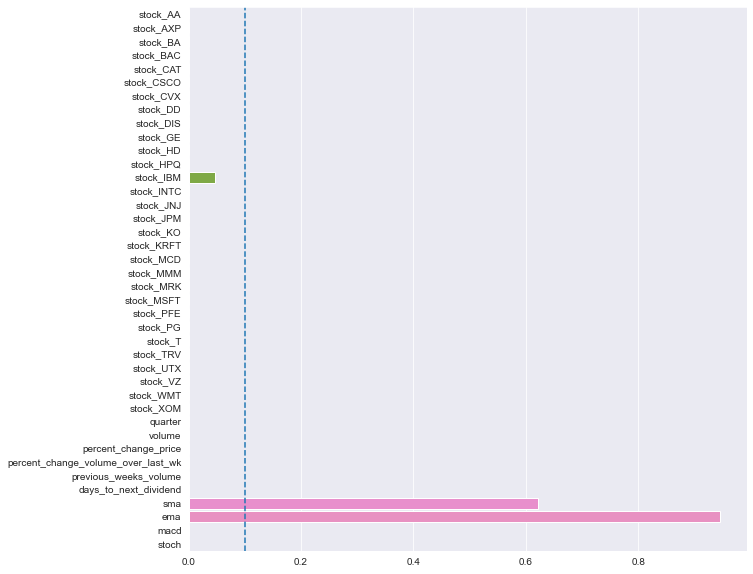

In [54]:
regressor = RandomForestRegressor(random_state=1, n_estimators=20)
regressor.fit(serial_x_train, serial_y_train)

regressor.feature_importances_

plt.figure(figsize=(10,10))
sns.barplot(x=regressor.feature_importances_, y=output_features, orient='h')
plt.axvline(0.1, linestyle='--')

The tree focuses its feature importance on non-dummy features, which are the most generalizable. For this reason, we will train different models solely on the two most important features:
- sma
- ema


Two features doesn't sound like a lot of predictive power. However, SMA and EMA capture a lot of information regarding the past, which might help explain their sole importance. MACD and STOCH were both deemed useless, most likely due to the lack of volatiltiy in the data.<br>
I then proceeded to train multiple models and finding out the best using a Grid Search combined with Cross Validation.

<a id='Modelling'></a>
### Modelling

Proceed with modelling using SMA and EMA as features.

In [551]:
# Isolate the features selected by the RF feature selection

serial_x_features_train = serial_x_train.copy()
serial_x_features_test = serial_x_test.copy()

# Recall from output_features that SMA and EMA are, respectively, the -4 and -3 indexes

feature_names = ['sma', 'ema']
serial_x_features_train = serial_x_features_train[:, -4:-2]
serial_x_features_test =  serial_x_features_test[:, -4:-2]

In [552]:
models = {
    'lr': LinearRegression(normalize= False),
    'lasso': LassoCV(normalize= False),
    'rf': RandomForestRegressor(),
    'ada': AdaBoostRegressor(),
    'gbm': GradientBoostingRegressor(),
}

parameters: Dict = {
    'lr': {'fit_intercept': [True, False]},
    'lasso': {'fit_intercept': [True, False], 'eps': [1e-4,1e-3,1e-2], 'n_alphas': [50, 100, 150, 200], 'max_iter': [1000, 2000, 5000]},
    'rf': {'n_estimators': [20, 50, 100, 150], 'max_depth': [1, 2, 3]},
    'ada': {'learning_rate': [1, 0.95, 0.9]},
    'gbm': {'learning_rate': [1, 0.95, 0.9], 'n_estimators': [20, 50, 100, 150],'max_depth': [1, 2, 3]},
}
    
results: Dict = defaultdict(dict)
    
for model in models.items():
    name: str = model[0]
    estimator = model[1]
    params = parameters[name]
    gs = GridSearchCV(estimator= model[1], param_grid = params, scoring='r2', cv=10, n_jobs=-1)
    gs.fit(X= serial_x_features_train, y= serial_y_train)
    
    predict_train: np.ndarray = gs.predict(serial_x_features_train)
    predict: np.ndarray = gs.predict(serial_x_features_test)
        
    result = results[name]
    
    result['best_params'] = gs.best_params_
    result['mse_train'] = mean_squared_error(serial_y_train, predict_train)
    result['mse_test'] = mean_squared_error(serial_y_test, predict)
    result['r2_train'] = r2_score(serial_y_train, predict_train)
    result['r2_test'] = r2_score(serial_y_test, predict)

C:\Users\Horus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [553]:
results

defaultdict(dict,
            {'lr': {'best_params': {'fit_intercept': False},
              'mse_train': 0.12111385820748224,
              'mse_test': 0.13312822019159345,
              'r2_train': 0.8788861417925178,
              'r2_test': 0.8671728739039599},
             'lasso': {'best_params': {'eps': 0.001,
               'fit_intercept': False,
               'max_iter': 1000,
               'n_alphas': 50},
              'mse_train': 0.12111481465498834,
              'mse_test': 0.1330381040651575,
              'r2_train': 0.8788851853450117,
              'r2_test': 0.8672627862161066},
             'rf': {'best_params': {'max_depth': 3, 'n_estimators': 50},
              'mse_train': 0.011042062354682785,
              'mse_test': 0.012108217492567224,
              'r2_train': 0.9889579376453173,
              'r2_test': 0.9879191674810277},
             'ada': {'best_params': {'learning_rate': 0.9},
              'mse_train': 0.004370962147447203,
              'mse_t

As expected, given the presence of only two features, the Linear Regression underperformed given the linear dependency is no longer given. Several models yielded a very high R2 in both train and test. In this case typically we'd select the simplest and most explainable model which has the smallest gap betweent he train and test measures. Between Adaboost and GBM, that would be GBM.

In [554]:
gb: GradientBoostingRegressor = GradientBoostingRegressor(max_depth = 3, n_estimators = 100)
gb.fit(X= serial_x_features_train, y= serial_y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Let us then visualize and compare the predicted vs actuals

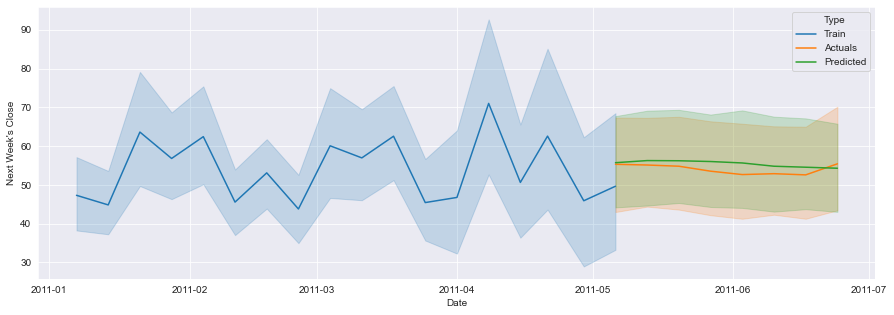

In [604]:
fig = plt.figure(figsize=(15,5))
# Transformation used for the Y-variable
_, pipe, _ = ct_serial_y.transformers_[0]

# Train (70%)
base: pd.DataFrame = pd.DataFrame(pipe.inverse_transform(serial_y_train)).rename(columns={0: 'next_weeks_close'})
base_dates = serial_train_dates
base = pd.concat([base, base_dates], axis=1)
base['Type'] = 'Train'

# Test (30%)
actuals: pd.DataFrame = pd.DataFrame(pipe.inverse_transform(serial_y_test)).rename(columns={0: 'next_weeks_close'})
actuals = pd.concat([actuals, serial_test_dates.reset_index()], axis = 1)
actuals['Type'] = 'Actuals'
  
# Predicted (30%)
predictions: np.ndarray = gb.predict(serial_x_features_test)

# Reverse the transformation performed on the y variable
predictions = pipe.inverse_transform(predictions)

predicted: pd.DataFrame = pd.DataFrame(predictions).rename(columns={0: 'next_weeks_close'})
predicted.index = actuals.index
predicted = pd.concat([predicted, serial_test_dates.reset_index()], axis = 1)
predicted['Type'] = 'Predicted'

aggregated_data: pd.DataFrame = pd.concat([base, actuals, predicted], axis = 0)
    
fig = sns.lineplot(data=aggregated_data, x='date', y = 'next_weeks_close', hue='Type')

fig.set(xlabel='Date', ylabel="Next Week's Close");

<a id='SerialCorrelation'></a>
## Data Understanding - Serial Correlation (Time Series)

Unfortunately Facebook's Prophet isn't working properly - I could not get it to install within a decent timeframe. The project not only selects the optimal SARIMAX model automatically via ADF and PACDF, it also decomposes the time series into trend, seasonality and additive/multiplicative. In addition, the package generates plots on the fly. <br>

For this reason, I did not follow through on the serial correlation approach.<br>

However, the data does not seem to contain a trend nor seasonality hence, time series might not be the best approach for a couple of month's worth of data.

In [608]:
gm_prophet = ph.Prophet()
gm = serial_data.rename(columns={'date': 'ds', 'next_weeks_close': 'y'})
gm_prophet.fit(gm)

,quarter,stock,ds,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,y,days_to_next_dividend,sma,ema,macd,stoch
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.792670,1.380223,239655616.0,15.97,26,16.0775,16.420000,0.000000,0.000000
12,1,AXP,2011-01-07,43.30,45.60,43.11,44.36,45102042,2.448040,1.380223,239655616.0,46.25,89,16.0775,44.360000,0.000000,0.000000
24,1,BA,2011-01-07,66.15,70.10,66.00,69.38,36258120,4.882840,1.380223,239655616.0,70.07,33,16.0775,69.380000,0.000000,0.000000
36,1,BAC,2011-01-07,13.85,14.69,13.80,14.25,1453438639,2.888090,1.380223,239655616.0,15.25,54,16.0775,14.250000,0.000000,0.000000
48,1,CAT,2011-01-07,94.38,94.81,92.30,93.73,24135903,-0.688705,1.380223,239655616.0,94.01,11,16.0775,93.730000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2,TRV,2011-06-24,57.57,58.28,56.12,56.68,20959450,-1.545940,1.510429,20647583.0,59.11,75,58.7475,58.416067,-1.536179,0.000000
710,2,UTX,2011-06-24,84.36,86.21,83.69,84.33,20775217,-0.035562,-5.887567,22074891.0,90.13,54,83.7100,84.445674,-1.454035,0.236919
723,2,VZ,2011-06-24,35.35,36.17,35.20,36.00,82375230,1.838760,18.379177,69585912.0,37.80,12,35.5825,35.867521,-0.147634,0.246951
736,2,WMT,2011-06-24,52.70,53.70,52.35,52.41,75602550,-0.550285,9.574392,68996550.0,53.51,47,52.9025,52.984981,0.061211,0.077994


<a id='Conclusion'></a>
# Conclusion
Assuming no serial correlation, the optimal model would be a Gradient Boosting with a max depth of 3 and 50 decision trees fitted on the residuals. The approach removes all significance from the stock itself, relying instead only on the stock's simgle moving average and exponentially weighted moving average, both typical indicators in finance.

The model scored a train 98.89% and 98.79% ${R^2}$ and 0.011 and 0.012 $RMSE$ in the training and test sets, respectivelly. <br>

Note however that this high 'accuracy' is likely due to the data's linear trend with low volatility. If the analysis was ran in the long-run, the model would likely underperform, especially considering black swan events.